# Data Wrangling *WeRateDogs DAND Project*
*By Paul Stancliffe*

In [1]:
# Import the libraries needed for this project
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
from IPython.display import HTML

## Gathering the Data

#### 1) WeRateDogs Twitter Archive

In [2]:
# WeRateDogs Twitter archive file obtained as a csv file. Pandas dataframe created from csv file.
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Exploration of data in file
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Exploration of data types and missing data.
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2) Tweet Image Predictions

In [5]:
#Using the requests package download image predictions data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
#check the contents of the request
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [7]:
#create a folder for image predictions data
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [8]:
#Write image predictions data to a file in our folder
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [9]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
# Exploration of data in file
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
# Exploration of data types and missing fields.
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 3) Twitter API 

In [12]:
# Authentication process to use Tweepy API
consumer_key = ##############
consumer_secret = ##############
access_token = ##############
access_secret = ################

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [13]:
# Creating list of tweet ids
tweet_id = twitter_archive_df['tweet_id']
list(tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [14]:
#Investigating the first tweet for information available.
tweet = api.get_status(tweet_id[0])
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540},
     'medium': {'h': 528, 'resize': 'fit', 'w': 540},
     'small': {'h': 528, 'resize': 'fit', 'w': 540},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/MgUWQ76dJU'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/ph

In [15]:
# Iterate over tweet_ids to obtain favorites and retweet count. Then append these has dicts into df_list.
df_list = []

# Any tweet_ids not found by API, are appended to e_list
e_list = []

for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        e_list.append(id)
        

892420643555336193 38840 8604
892177421306343426 33272 6318
891815181378084864 25069 4193
891689557279858688 42229 8714
891327558926688256 40369 9488
891087950875897856 20245 3136
890971913173991426 11865 2090
890729181411237888 65632 19072
890609185150312448 27801 4303
890240255349198849 31979 7481
890006608113172480 30690 7400
889880896479866881 27827 5011
889665388333682689 48175 10145
889638837579907072 27208 4582
889531135344209921 15118 2253
889278841981685760 25335 5480
888917238123831296 29124 4540
888804989199671297 25624 4382
888554962724278272 19936 3614
888078434458587136 21787 3529
887705289381826560 30230 5439
887517139158093824 46302 11760
887473957103951883 69219 18397
887343217045368832 33731 10495
887101392804085760 30579 6006
886983233522544640 35202 7833
886736880519319552 12087 3323
886680336477933568 22461 4510
886366144734445568 21161 3211
886267009285017600 116 4
886258384151887873 28011 6347
886054160059072513 0 104
885984800019947520 32761 6867
885528943205470

838561493054533637 11662 1463
838476387338051585 24191 5313
838201503651401729 0 11155
838150277551247360 1791 358
838085839343206401 149 0
838083903487373313 18856 3468
837820167694528512 36577 8681
837482249356513284 4114 488
837471256429613056 13708 2550
837366284874571778 22617 5836
837110210464448512 17131 2645
836989968035819520 13622 2537
836753516572119041 20604 5090
836677758902222849 13501 2449
836648853927522308 0 607
836397794269200385 0 30448
836380477523124226 15751 3241
836260088725786625 22747 4731
836001077879255040 20479 4759
835685285446955009 0 9040
835574547218894849 19083 4005
835536468978302976 0 1879
835309094223372289 0 23258
835297930240217089 17551 3301
835264098648616962 8327 1879
835246439529840640 2234 81
835172783151792128 28006 6352
835152434251116546 24084 3351
834931633769889797 11615 1823
834786237630337024 22627 6032
834574053763584002 14709 2803
834477809192075265 0 11803
834458053273591808 10320 1852
834209720923721728 22121 5301
834167344700198914

801127390143516673 0 4493
801115127852503040 8831 2357
800859414831898624 757 109
800855607700029440 0 1840
800751577355128832 11482 3127
800513324630806528 14393 3399
800459316964663297 10340 2425
800443802682937345 0 4897
800388270626521089 12212 3160
800188575492947969 0 4445
800141422401830912 16741 2900
800018252395122689 31089 14908
799774291445383169 0 5309
799757965289017345 9204 2441
799422933579902976 8799 2156
799308762079035393 0 6268
799297110730567681 10848 3139
799063482566066176 8857 2784
798933969379225600 14421 5066
798925684722855936 8117 1621
798705661114773508 0 7487
798701998996647937 0 8839
798697898615730177 0 7361
798694562394996736 0 5626
798686750113755136 0 2622
798682547630837760 0 5357
798673117451325440 0 6288
798665375516884993 0 4397
798644042770751489 0 2092
798628517273620480 0 2216
798585098161549313 0 6460
798576900688019456 0 6664
798340744599797760 0 3801
798209839306514432 11352 2880
797971864723324932 12759 3557
797545162159308800 15893 5480
797

763103485927849985 7978 2535
762699858130116608 13218 4052
762471784394268675 12259 7281
762464539388485633 11231 4696
762316489655476224 5233 1257
762035686371364864 34700 17414
761976711479193600 5871 2250
761750502866649088 0 4396
761745352076779520 4618 953
761672994376806400 53701 32395
761599872357261312 4480 1308
761371037149827077 0 19950
761334018830917632 5659 1612
761292947749015552 4839 1229
761227390836215808 5776 1722
761004547850530816 12218 3852
760893934457552897 4149 1079
760656994973933572 7167 2144
760641137271070720 5372 1441
760539183865880579 8215 4044
760521673607086080 4584 1555
760290219849637889 29026 12791
760252756032651264 4269 962
760190180481531904 6192 2015
760153949710192640 0 37
759943073749200896 6447 2323
759923798737051648 15926 6334
759846353224826880 7277 2208
759793422261743616 6468 2121
759566828574212096 0 23586
759557299618865152 5093 1305
759447681597108224 9223 2735
759446261539934208 1811 546
759197388317847553 6567 2164
759159934323924993

727175381690781696 4131 1494
727155742655025152 3884 1450
726935089318363137 7343 2673
726887082820554753 4100 1645
726828223124897792 3791 1099
726224900189511680 4714 1269
725842289046749185 7528 2894
725786712245440512 4447 1485
725729321944506368 5533 1947
725458796924002305 1507 679
724983749226668032 3959 1428
724771698126512129 2535 698
724405726123311104 5672 1799
724049859469295616 4628 1930
724046343203856385 2846 606
724004602748780546 4474 1730
723912936180330496 4143 1338
723688335806480385 8242 3256
723673163800948736 3231 974
723179728551723008 5651 2050
722974582966214656 4388 1715
722613351520608256 5290 1789
721503162398597120 4985 2050
721001180231503872 2690 669
720785406564900865 3326 840
720775346191278080 2642 742
720415127506415616 4406 1630
720389942216527872 6845 2759
720340705894408192 3061 1063
720059472081784833 4148 1235
720043174954147842 5226 2187
719991154352222208 5160 1913
719704490224398336 4868 1586
719551379208073216 5397 2114
719367763014393856 29

697463031882764288 3657 1512
697270446429966336 5005 2039
697259378236399616 3524 1093
697255105972801536 3240 1272
697242256848379904 2697 732
696900204696625153 3426 1123
696894894812565505 2523 738
696886256886657024 5183 1960
696877980375769088 2625 780
696754882863349760 1578 387
696744641916489729 2235 1039
696713835009417216 2549 716
696518437233913856 4186 1850
696490539101908992 1311 162
696488710901260288 2726 1132
696405997980676096 3445 1246
696100768806522880 2077 725
695816827381944320 3214 1281
695794761660297217 3413 853
695767669421768709 2007 819
695629776980148225 4906 2314
695446424020918272 4667 1979
695409464418041856 9230 3909
695314793360662529 3913 1619
695095422348574720 2826 673
695074328191332352 3047 1208
695064344191721472 1721 659
695051054296211456 2855 864
694925794720792577 2896 1007
694905863685980160 2966 1028
694669722378485760 38215 15854
694356675654983680 1615 316
694352839993344000 2182 679
694342028726001664 1686 530
694329668942569472 2151 548

680115823365742593 2899 1003
680100725817409536 3814 1507
680085611152338944 13666 9778
680070545539371008 2748 962
680055455951884288 17875 7829
679877062409191424 2099 706
679872969355714560 2312 726
679862121895714818 2631 684
679854723806179328 3071 1356
679844490799091713 2535 857
679828447187857408 38796 15392
679777920601223168 3299 1235
679736210798047232 2240 882
679729593985699840 2310 906
679722016581222400 1770 520
679530280114372609 5082 2278
679527802031484928 2832 802
679511351870550016 3605 1415
679503373272485890 3383 1629
679475951516934144 2246 703
679462823135686656 34018 20699
679405845277462528 2539 1328
679158373988876288 22993 8915
679148763231985668 2959 1130
679132435750195208 3169 1275
679111216690831360 6378 2813
679062614270468097 18284 9044
679047485189439488 2408 752
679001094530465792 3015 1351
678991772295516161 2483 1284
678969228704284672 1749 506
678800283649069056 2745 988
678798276842360832 3723 1303
678774928607469569 2968 1011
678767140346941444 

672245253877968896 713 164
672239279297454080 929 336
672231046314901505 1915 1065
672222792075620352 813 224
672205392827572224 2349 1226
672169685991993344 1057 393
672160042234327040 905 382
672139350159835138 1824 766
672125275208069120 2502 1211
672095186491711488 1034 388
672082170312290304 979 387
672068090318987265 1352 545
671896809300709376 8791 4397
671891728106971137 1382 594
671882082306625538 3603 1454
671879137494245376 1478 728
671874878652489728 1302 584
671866342182637568 1170 531
671855973984772097 954 483
671789708968640512 7341 3692
671768281401958400 1239 553
671763349865160704 1749 975
671744970634719232 1398 817
671743150407421952 767 240
671735591348891648 1499 792
671729906628341761 8887 4632
671561002136281088 13385 7684
671550332464455680 951 219
671547767500775424 1411 632
671544874165002241 2075 1110
671542985629241344 1135 598
671538301157904385 962 418
671536543010570240 1225 435
671533943490011136 1070 611
671528761649688577 876 272
671520732782923777 1

666739327293083650 240 67
666701168228331520 441 223
666691418707132416 190 48
666649482315059201 896 592
666644823164719104 235 85
666454714377183233 529 212
666447344410484738 105 22
666437273139982337 129 50
666435652385423360 168 54
666430724426358785 321 199
666428276349472768 166 84
666421158376562688 319 114
666418789513326592 127 47
666411507551481857 450 329
666407126856765440 111 41
666396247373291520 168 86
666373753744588802 189 93
666362758909284353 783 577
666353288456101888 223 73
666345417576210432 300 140
666337882303524864 199 92
666293911632134144 512 358
666287406224695296 150 68
666273097616637952 178 76
666268910803644416 105 35
666104133288665088 14404 6664
666102155909144576 79 13
666099513787052032 158 69
666094000022159362 166 76
666082916733198337 119 45
666073100786774016 323 166
666071193221509120 148 62
666063827256086533 479 223
666058600524156928 112 57
666057090499244032 298 141
666055525042405380 437 257
666051853826850816 1229 854
666050758794694657 1

In [16]:
# Analysis of first 5 tweets to ensure iteration has worked correctly
df_list[:5]

[{'favorites': 38840, 'retweet_count': 8604, 'tweet_id': 892420643555336193},
 {'favorites': 33272, 'retweet_count': 6318, 'tweet_id': 892177421306343426},
 {'favorites': 25069, 'retweet_count': 4193, 'tweet_id': 891815181378084864},
 {'favorites': 42229, 'retweet_count': 8714, 'tweet_id': 891689557279858688},
 {'favorites': 40369, 'retweet_count': 9488, 'tweet_id': 891327558926688256}]

In [17]:
# View list of exceptions
e_list

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464]

In [18]:
# Try re-iteration for tweet_ids in exception list as suggested by other students to see if there was an error the 
# first time.   
ee_list = []

for e in e_list:
    try:
        page = api.get_status(e, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        
        df_list.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweet_count': int(retweets)
                        })
        
    except Exception:
        ee_list.append(e)
       

In [19]:
# View list of exceptions again. The presumption is these tweets are no longer available to get with the API.
ee_list

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464]

In [20]:
# With the data collected, create a pandas dataframe
json_tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])

In [21]:
# Save a copy of the data to a txt file for future reference as requested by the project
json_tweets_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [22]:
# Created a csv file in order to download and open without issues in Excel for visual inspection
json_tweets_df.to_csv('tweet_json.csv',encoding='utf-8',index=False)

In [24]:
json_tweets_df.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,38840,8604
1,892177421306343426,33272,6318
2,891815181378084864,25069,4193
3,891689557279858688,42229,8714
4,891327558926688256,40369,9488


In [25]:
json_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id         2345 non-null int64
favorites        2345 non-null int64
retweet_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


## Assessing the Data

**From the key points section of the project submission - Assess the datasets with the following end result in mind - We want "only originial ratings (no retweets) that have images"**  

#### Visually with Excel and Pandas    

During the gathering stage, each of the three datasets were opened in pandas with df.head() and df.info() in order to get a feel for the datasets.

The csv files for each dataset were downloaded and opened in Excel. The dataset with around 2500 rows was manageable in Excel and using the filters function gave a good feel of the data inside each of the three datasets. From Excel it was quickly identified the many incorrect names in the dataset for the dogs and the strange rating scores being used for both denominator when you would only expect 10 and for the numerator.

#### Programmatically   

Some further sampling and investigation was done in pandas using df.info(),  df.head(),  df.sample(),  df\['column'].value_counts() - see below.

### Issues to clean

Below is a list of issues found that need cleaning.

### Quality (completeness, validity, accuracy, and consistency issues)

- (3) "twitter_archive_df" has 2356 rows while the "image_predictions_df" has only 2075 rows, probably due to retweets and missing photos.
- (2) "twitter_archive_df" contains 181 retweets and 78 replies which not needed.
- (6) there are many names of dogs which are clearly incorrect such as 'a', 'actually', 'all'   
- (7) strange unexpected values in rating_denominator   
- (8) strange unexpected values in rating_numerator    
- (9) source data column is not clear    
- (10) timestamp column has not necessary +0000   
- (11) not all the data are in their most appropriate data type   
- (12) consistent names and logical order to column data as final step in cleaning


### Tidiness (structural issues)

- (1) there are 3 dataframes, only 1 dataframe should suffice to incorporate the data we need.
- (4) there are 4 columns for doggo, floffer, pupper, and puppo in the "twitter_archive_df" but this is same categorical data that would be better in only 1 column.
- (5) there are 3 predictions for the dog breed in the "image_predictions_df" but maybe the best prediction will suffice to reduce the size of the final dataframe. 

In [27]:
# In the gathering sections, each of the 3 datasets were viewed programmatically with df.head() and df.info()
# to get a basic understanding of the columns and datatypes.

# Programmatical sampling on each of the dataframes
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
329,833479644947025920,NaN,NaN,2017-02-20 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Poppy. She just arrived. 13/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833479644...,13,10,Poppy,None,None,None,None
1511,691416866452082688,NaN,NaN,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I present to you... Dog Jesus. 13/10 (he could...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
1139,728015554473250816,NaN,NaN,2016-05-05 00:16:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rueben. He has reached ultimate pupper...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728015554...,11,10,Rueben,None,None,pupper,None
1424,697990423684476929,NaN,NaN,2016-02-12 03:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's a Draconian Jabbawockee. Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697990423...,11,10,Doug,None,None,None,None
1949,673689733134946305,NaN,NaN,2015-12-07 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a blast and remember tomorr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673689733...,11,10,None,None,None,None,None


In [28]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True
1854,841077006473256960,https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg,1,Brittany_spaniel,0.962985,True,Blenheim_spaniel,0.014820,True,clumber,0.009557,True
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
1279,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,Shih-Tzu,0.814405,True,Lhasa,0.175220,True,Pekinese,0.008072,True
1921,856526610513747968,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,1,Old_English_sheepdog,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1849,839990271299457024,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2,Staffordshire_bullterrier,0.604938,True,American_Staffordshire_terrier,0.311540,True,Boston_bull,0.037159,True
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1396,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,coral_reef,0.327740,False,cliff,0.157182,False,lakeside,0.048810,False


In [30]:
json_archive_df.sample(10)

,tweet_id,favorites,retweet_count
1376,700505138482569216,2442,623
1412,697995514407682048,1631,363
552,802624713319034886,0,3303
963,750056684286914561,3376,983
2043,671390180817915904,1471,782
896,757741869644341248,7450,3605
2271,667211855547486208,505,250
1703,680440374763077632,1551,552
225,847978865427394560,0,3534
1591,685973236358713344,2268,590


In [18]:
twitter_archive_df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
an            7
Daisy         7
Toby          7
Bailey        7
Koda          6
Jax           6
Dave          6
Bella         6
Leo           6
Rusty         6
Scout         6
Oscar         6
Stanley       6
Jack          6
Milo          6
Gus           5
           ... 
Tonks         1
Berkeley      1
Doobert       1
Darla         1
Harnold       1
Cuddles       1
Pippin        1
Derby         1
Kody          1
Kobe          1
Eazy          1
Lucia         1
Bayley        1
Mabel         1
Bertson       1
Pumpkin       1
Tessa         1
Walker        1
Rilo          1
Hamrick       1
Jameson       1
Murphy        1
Loomis        1
Freddery      1
Ralphson      1
Einstein      1
Chadrick      1
Ito           1
Frönq         1
Dido          1
Name: name, Length: 957,

In [19]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Cleaning the Data

In [23]:
# Creat a copy of the original 3 datasets for reference
archive_clean_df = twitter_archive_df.copy()
image_clean_df = image_predictions_df.copy()
json_clean_df = json_tweets_df.copy() 

In [25]:
# Save a copy of the clean datasets to work with
archive_clean_df.to_csv('archive_clean.csv',encoding='utf-8',index=False)
image_clean_df.to_csv('image_clean.csv',encoding='utf-8',index=False)
json_clean_df.to_csv('json_clean.csv',encoding='utf-8',index=False)

In [2]:
# Load clean datasets
archive_clean_df = pd.read_csv('archive_clean.csv')
image_clean_df = pd.read_csv('image_clean.csv')
json_clean_df = pd.read_csv('json_clean.csv')

#### 1) Merge the 3 dataframes into 1 master dataframe

In [3]:
# Merge the three DataFrames into one master DataFrame, starting first with archive_clean and json_clean
first_archive_master_df = pd.merge(archive_clean_df, json_clean_df, on=['tweet_id','tweet_id'],how='left') 

In [4]:
# Check merge went as anticipated
first_archive_master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,38840.0,8604.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33272.0,6318.0


In [5]:
# Merge new master with image_clean
first_archive_master_df = pd.merge(first_archive_master_df, image_clean_df, on='tweet_id',how='left') 

In [6]:
# Increase number of visible columns in a pandas DataFrame to see all the columns in the newly created master_df
pd.set_option("display.max_columns",30)

In [7]:
# Check merge went as anticipated
first_archive_master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,38840.0,8604.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33272.0,6318.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
# Check twitter_archive_master_df
first_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     23

In [9]:
# Save a copy of the newly created master dataframe has a starting point for cleaning
first_archive_master_df.to_csv('first_archive_master.csv',encoding='utf-8',index=False)

In [10]:
df = pd.read_csv('first_archive_master.csv')

#### 2)  Remove Retweets and Replies

In [11]:
# there are 181 retweets, which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and 
# "retweeted_status_timestamp". We keep the rows that are null and remove the retweets.
df = df[df.retweeted_status_id.isnull()]

In [87]:
# check retweets have gone
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
favorites                     2175 non

In [12]:
# delete the columns related to retweets from the master dataframe.
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [13]:
# check the retweet columns have gone.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
favorites                2175 non-null float64
retweet_count            2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf              

In [14]:
# View the state of the dataframe
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,38840.0,8604.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33272.0,6318.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
# the "in_reply_to_status_id" includes the original tweet_id if there is a reply. There are 78 replies.
# We keep the rows that are null and remove the replies.
df = df[df.in_reply_to_status_id.isnull()]

In [16]:
# check the replies have gone
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
favorites                2097 non-null float64
retweet_count            2097 non-null float64
jpg_url                  1971 non-null object
img_num                  1971 non-null float64
p1                       1971 non-null object
p1_conf                

In [17]:
# delete the columns related to replies from the master dataframe.
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [18]:
# check the replies columns have gone.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorites             2097 non-null float64
retweet_count         2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

In [19]:
# View the state of the dataframe
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,38840.0,8604.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33272.0,6318.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### 3)  Remove tweets that don't have an image

In [20]:
# After deleting the retweets and replies we still have 126 tweets without an image, as this was one of the project's
# requirements we will delete the tweets without an image. This time we will keep the rows with an image.
df = df[df.jpg_url.notnull()]

In [21]:
# Check that we have an image for each tweet_id
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorites             1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

#### 4)  Melt the 4 categorical dog types 'doggo', 'floofer', 'pupper', and 'puppo' into 1 column 'dog_type'

In [22]:
# Check how many dog types there are of each
df['doggo'].value_counts()

None     1898
doggo      73
Name: doggo, dtype: int64

In [23]:
df['floofer'].value_counts()

None       1963
floofer       8
Name: floofer, dtype: int64

In [24]:
df['pupper'].value_counts()

None      1762
pupper     209
Name: pupper, dtype: int64

In [25]:
df['puppo'].value_counts()

None     1948
puppo      23
Name: puppo, dtype: int64

In [26]:
# Create list of columns for copying and pasting with melt function
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [27]:
# Melt the 4 columns into a column'types' to be deleted and a value'dog_type'column to keep.
df1 = pd.melt(df, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [28]:
# Check the dataframe structure after melting. We should have 4 copies of each tweet_id, one for each dog type.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 23 columns):
tweet_id              7884 non-null int64
timestamp             7884 non-null object
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null int64
rating_denominator    7884 non-null int64
name                  7884 non-null object
favorites             7884 non-null float64
retweet_count         7884 non-null float64
jpg_url               7884 non-null object
img_num               7884 non-null float64
p1                    7884 non-null object
p1_conf               7884 non-null float64
p1_dog                7884 non-null object
p2                    7884 non-null object
p2_conf               7884 non-null float64
p2_dog                7884 non-null object
p3                    7884 non-null object
p3_conf               7884 non-null float64
p3_dog                7884 non

In [29]:
# Check we still have all our dog types
df1.dog_type.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [30]:
# Sort the dataframe by dog type so that we can drop the 3 duplicates that don't contain a dog type.
df1 = df1.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [31]:
# We have lost 10 doggos!
df1.dog_type.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

I couldn't understand why there were 10 doggos less after performing the drop duplicates. I returned to my original Excel spreadsheet and filtered on the doggo column and found that in 14 rows there was more than 1 dog type selected. 

In [32]:
# I had to reiterate over the twitter_archive_master_df in order to identify the 10 tweet_ids. I created a dataframe
# that contained only tweet ids with doggo, floofer, pupper and puppo.
doggos_df = df.drop(['timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], axis=1)

In [33]:
# I had to set the rows to 75 to be able to see all the rows.
pd.set_option("display.max_rows",75)

# I sorted the dataframe to see all doggos and be able to manually identify the tweet_ids.
doggos_df = doggos_df[doggos_df.doggo != 'None']
doggos_df

,tweet_id,doggo,floofer,pupper,puppo
9,890240255349198849,doggo,None,None,None
43,884162670584377345,doggo,None,None,None
99,872967104147763200,doggo,None,None,None
108,871515927908634625,doggo,None,None,None
121,869596645499047938,doggo,None,None,None
172,858843525470990336,doggo,None,None,None
191,855851453814013952,doggo,None,None,puppo
200,854010172552949760,doggo,floofer,None,None
240,846514051647705089,doggo,None,None,None
248,845397057150107648,doggo,None,None,None


Manually created list from doggos_df showing the tweet_ids that have more than 1 dog type. Then manually read the
text to try to understand the correct dog type. 

Tweet_id.........................Pre-melt types....Correct Dog Type....Need to Change       
855851453814013952 ..doggo/puppo.......puppo......................no               
854010172552949760 ..doggo/floofer.......floofer.......................no                 
817777686764523521 ..doggo/pupper......doggo...................yes to doggo           
808106460588765185 ..doggo/pupper......both - 2 dogs........yes to none           
801115127852503040 ..doggo/pupper......doggo...................yes to doggo          
785639753186217984 ..doggo/pupper......doggo...................yes to doggo          
759793422261743616 ..doggo/pupper......both - 2 dogs........yes to none           
751583847268179968 ..doggo/pupper......none......................yes to none            
741067306818797568 ..doggo/pupper......both - 2 dogs.........yes to none            
733109485275860992 ..doggo/pupper......both - 2 dogs.........yes to none             

In [34]:
# Change dog types identified in the tweet_ids above
df1.loc[df1.tweet_id == 817777686764523521, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 808106460588765185, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 801115127852503040, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 759793422261743616, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 751583847268179968, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 741067306818797568, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 733109485275860992, 'dog_type'] = 'None'

In [35]:
# Delete column 'types'
df1 = df1.drop('types',axis=1)

In [36]:
# Check the dataframe status and the dog type value counts.
df1.info()
df1.dog_type.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 

None       1673
pupper      201
doggo        66
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [37]:
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,478.0,225.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,312.0,85.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None


#### 5)  Reducing the 3 columns that predict the Breed of the dog in the image to the most likely

In [38]:
# create 2 empty lists to save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
df1.apply(breed_confidence, axis=1)

# add lists created to master dataframe
df1['breed'] = breed
df1['confidence'] = confidence

# check the columns have been added
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,478.0,225.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,312.0,85.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None,Rottweiler,0.999091


In [39]:
# Drop predictions and prediction probability columns
df1 = df1.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [40]:
# Check columns have been dropped
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
dog_type              1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 231.0+ KB


#### 6)  Change dog names in names column for clearly incorrect data

In [41]:
# Check the list of dog names.
list(df1['name'])

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'a',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'a',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'a',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'a',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'a',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'a',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'a',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'a',
 'Lugan',
 'a',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'an',
 'a',
 'an',
 'None',
 'None',
 'None',
 'None',
 'None',
 'a',
 'quite',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kreggory',
 'Jimothy',
 'None',
 'None

In [42]:
# We see all incorrect names have their first letter has lowercase. We will use this to change them into 'None'. 
names=[]

#function iterates through name column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
df1.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
df1['names'] = names
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence,names
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,478.0,225.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377,Biden
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,312.0,85.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091,None
1893,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,463.0,248.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.000000,None
1892,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,805.0,605.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.000000,None
1891,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,320.0,93.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_retriever,0.825670,Cupcake


In [118]:
# print a list to check only names are present
df1['names'].unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Fwed', 'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Naphaniel',
       'Genevieve', 'Joshwa', 'Jockson', 'Jeph', 'Carll', 'Klevin', 'Keet',
       'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie', 'Kenneth',
       'Clarence', 'Timison', 'Filup', 'Shaggy', 'Josep', 'Tedrick', 'Stu',
       'Erik', 'Cleopatricia', 'Otis', 'Jiminy', 'Alfie', 'Lugan',
       'Christoper', 'Walter', 'Scout', 'Kreggory', 'Jimothy', 'Phineas',
       'Cash', 'Nugget', 'Goose', 'Venti', 'Benedict', 'Nelly', 'Dante',
       'Penny', 'Aja', 'Emmy', 'Shadow', 'Beau', 'Derek', 'Mingus', 'Maya',
       'Canela', 'Jeffrey', 'Gerald', 'Ralphus', 'Zeke', 'Jim', 'Oliver',
       'Ted', 'Bruno', 'Koda', 'Zoey', 'Jax', 'Franklin', 'Darla',
       'Archie', 'Tilly', 'Waffles', 'Jimbo', 'Steven', 'Jack', 'Duddles',
       'Bailey', 'Romeo', 'Jesse', 'Bella', 'Louis', 'Elliot', 'Gary',
       'Rey', 'Koko', 'Alfy', 'Stanley', 'Rusty', '

In [43]:
# update original name column
df1['name'] = df1['names']

In [44]:
# delete names column
df1 = df1.drop('names', axis=1)

In [45]:
# check name column is updated correctly.
df1['name'].value_counts()

None         622
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Toby           7
Daisy          7
Lola           7
Stanley        6
Koda           6
Bo             6
Bella          6
Jax            6
Chester        5
Milo           5
Leo            5
Scout          5
Buddy          5
Bailey         5
Louis          5
Rusty          5
Oscar          5
Dave           5
Reggie         4
Clark          4
Oakley         4
Bentley        4
Jerry          4
Alfie          4
Gary           4
Bear           4
Chip           4
Larry          4
            ... 
Brockly        1
Socks          1
Batdog         1
Filup          1
Goliath        1
Amélie         1
Olaf           1
Bubba          1
Grizzwald      1
Chesney        1
Vinscent       1
Jebberson      1
Shooter        1
Cermet         1
Chelsea        1
Mabel          1
Rinna          1
Opie           1
Freddery       1
Hamrick        1
Dwight        

#### 7)  Investigate surprising values in rating_denominator

In [46]:
# List the different denominators
df1.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [47]:
# Make available a column list for copying and pasting
df1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweet_count', 'jpg_url', 'dog_type', 'breed', 'confidence'],
      dtype='object')

In [48]:
# Create a new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating_df = df1.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [49]:
# Filter new dataframe to include only denominators not equal to expected 10
rating_df = rating_df[rating_df.rating_denominator != 10]

In [50]:
# Set the column width in pandas so the full tweet text can be read for analysis
pd.set_option("display.max_colwidth",280)

In [51]:
# Display full dataframe
rating_df

,tweet_id,text,rating_numerator,rating_denominator
1950,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
3284,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2889,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80


In [52]:
# Reading the text of Tweet_id 666287406224695296 - the correct value should be 9/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df1.loc[df1.tweet_id == 666287406224695296, 'rating_denominator'] = 10

In [53]:
# Reading the text of Tweet_id 682962037429899265 - the correct value should be 10/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 682962037429899265, 'rating_denominator'] = 10

In [54]:
# Reading the text of Tweet_id 716439118184652801 - the correct value should be 11/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df1.loc[df1.tweet_id == 716439118184652801, 'rating_denominator'] = 10

In [55]:
# Reading the text of Tweet_id 810984652412424192 - there is no correct value in the text so allocated 10/10
# so has to be neutral
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 810984652412424192, 'rating_denominator'] = 10

In [56]:
# Reading the text of Tweet_id 740373189193256964 - the correct value should be 14/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df1.loc[df1.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [134]:
# Reading the text of Tweet_id 722974582966214656 - the correct value should be 13/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df1.loc[df1.tweet_id == 722974582966214656, 'rating_denominator'] = 10

In [57]:
# The other strange denominator ratings are due to the tweet being based on groups of dogs and the tweeter
# has given a rating for each member of the group. I'll leave these ratings as it reflects the text and photo.

In [58]:
# check the above changes to the rating_denominator have occurred
df1.rating_denominator.value_counts()

10     1959
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

#### 8)  Investigate surprising values in rating_numerator

In [59]:
# List the different numerators
df1.rating_numerator.value_counts()

12      446
10      419
11      393
13      253
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        16
2         9
1         4
1776      1
26        1
420       1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [60]:
# Create another new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating2_df = df1.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [61]:
# This time our expectation would be a value between 0 and 14.
# Filter the dataframe to include values outside of the above parameter.
rating2_df = rating2_df[rating2_df.rating_numerator > 14]

In [62]:
# Display full dataframe
rating2_df

,tweet_id,text,rating_numerator,rating_denominator
3330,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3667,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80
3391,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


In [63]:
# Most of the tweets relate to groups of dogs already discussed in the previous section 7.
# Reading through the others, there are some users giving decimal point evaluations. I will round these to the nearest
# whole number.

df1.loc[df1.tweet_id == 680494726643068929, 'rating_numerator'] = 11  # 11.26 rounded to 11 
df1.loc[df1.tweet_id == 786709082849828864, 'rating_numerator'] = 10  # 9.75 rounded to 10
df1.loc[df1.tweet_id == 778027034220126208, 'rating_numerator'] = 11  # 11.27 rounded to 11

# There are 2 tweets with ridiculous ratings of 420/10 and 1776/10, but I'll leave these because it is the rating given
# by the tweeter and the site is a "tongue-in-cheek" site. I just remember to eliminate these outliers in any analyses or
# visualizations.

In [64]:
# check the above changes to the rating_numerator have occurred
df1.rating_numerator.value_counts()

12      446
10      420
11      395
13      253
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        16
2         9
1         4
1776      1
420       1
44        1
45        1
60        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

#### 9)  Shorten data in source column by using regex library

In [65]:
# Use re library with findall function and extract real source from tags > ...... <
df1['source'] = df1['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [66]:
# Check extracted correct information
df1['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### 10)  Remove unnecessary numbers from timestamp column and change data type to datetime

In [67]:
# Strip +0000 from timestamp column
df1.timestamp = df1.timestamp.str.strip('+0000')

In [68]:
# Convert data type to datetime
df1.timestamp = pd.to_datetime(df1.timestamp)

In [69]:
# Check the changes have been made
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
dog_type              1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 231.0+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,478.0,225.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,312.0,85.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091


#### 11)  Convert each column to its most appropriate data type

In [70]:
# Convert data types to most suitable data type and round confidence to 2 decimal places to make easier to read
df1['tweet_id'] = df1['tweet_id'].astype(object)
df1['source'] = df1['source'].astype('category')
df1['favorites'] = df1['favorites'].astype(int)
df1['retweet_count'] = df1['retweet_count'].astype(int)
df1['dog_type'] = df1['dog_type'].astype('category')
df1['confidence'] = df1['confidence'].round(2)

In [71]:
# Check conversion of data types and confidence is now 2 decimal places
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null category
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
dog_type              1971 non-null category
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 204.3+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,478,225,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.38
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,312,85,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,1.00


#### 12)  Rename and reorder columns in a logical manner

In [72]:
# View of current dataframe for use as reference
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,478,225,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.38
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,312,85,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,1.00


In [73]:
# Rename columns to make easier to understand for someone not familiar with the original data sets
df1 = df1.rename(columns = {'timestamp':'tweet_date',
                           'source': 'tweet_source',
                           'text': 'tweet_text',
                           'expanded_urls': 'tweet_url',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'favorites':'no_of_likes',
                           'jpg_url': 'image_link',
                           'breed': 'dog_breed',
                           'confidence': 'probability_AI_calc'})

In [74]:
# Reorder the columns into a logical order
df1 = df1[['tweet_id','tweet_date','tweet_source','tweet_text','dog_name',
           'dog_score','out_of','dog_type','dog_breed','probability_AI_calc',
          'no_of_likes','retweet_count','tweet_url','image_link']]

In [75]:
# Final check of the structure of the dataframe
df1.head(25)

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,Biden,7,10,None,Saint_Bernard,0.38,478,225,https://twitter.com/dog_rates/status/667405339315146752/photo/1,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,312,85,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,None,10,10,None,Unknown,0.00,463,248,https://twitter.com/dog_rates/status/667437278097252352/photo/1,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,None,6,10,None,Unknown,0.00,805,605,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.83,320,93,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
1890,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,Reese,7,10,None,Tibetan_terrier,0.68,195,65,https://twitter.com/dog_rates/status/667455448082227200/photo/1,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg
1889,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,11,10,None,toy_poodle,0.30,264,101,https://twitter.com/dog_rates/status/667470559035432960/photo/1,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
1888,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,7,10,None,borzoi,0.85,548,237,https://twitter.com/dog_rates/status/667491009379606528/photo/1,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
1887,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,Philippe,9,10,None,Chihuahua,0.14,545,287,https://twitter.com/dog_rates/status/667495797102141441/photo/1,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg
1886,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,Hall,11,10,None,Labrador_retriever,1.00,548,227,https://twitter.com/dog_rates/status/667502640335572993/photo/1,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg


In [76]:
# Save a copy of the dataframe to csv for future reference
df1.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [77]:
df_clean = pd.read_csv('twitter_archive_master.csv')

In [78]:
df_clean.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,Biden,7,10,None,Saint_Bernard,0.38,478,225,https://twitter.com/dog_rates/status/667405339315146752/photo/1,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,312,85,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,None,10,10,None,Unknown,0.00,463,248,https://twitter.com/dog_rates/status/667437278097252352/photo/1,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,None,6,10,None,Unknown,0.00,805,605,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.83,320,93,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg


## Analyzing the Data

In [79]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 'Magic word' so that your visualizations are plotted
%matplotlib inline

# Set style of plots with seaborn
sns.set(style="darkgrid",font_scale=1.5)

In [80]:
# Quick analysis of some of the numbers 
df_clean.describe()

,tweet_id,dog_score,out_of,probability_AI_calc,no_of_likes,retweet_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,7.360418e+17,12.155758,10.461695,0.466301,8913.575850,2738.262303
std,6.752810e+16,41.597108,6.792047,0.339697,12636.708631,4721.071409
min,6.660209e+17,0.000000,10.000000,0.000000,79.000000,13.000000
25%,6.758656e+17,10.000000,10.000000,0.140000,1949.000000,611.000000
50%,7.088343e+17,11.000000,10.000000,0.460000,4064.000000,1328.000000
75%,7.880951e+17,12.000000,10.000000,0.780000,11205.000000,3142.000000
max,8.924206e+17,1776.000000,170.000000,1.000000,143516.000000,77445.000000


** As a non-dog owner, but a potential future dog owner, I'd like to know, "Which breed of dog will bring me and my family most happiness?" **   

** From the WeRateDogs Twitter account we can obtain quickly some initial information to start our decision process. **  

** We can answer the following questions: **  
** Which breeds are most tweeted about? **   
** Which breeds obtain the highest ratings? **
** Which breeds receive most likes on average? **


In [81]:
# Which breeds are most tweeted
df_clean.dog_breed.value_counts().nlargest(10)

Unknown               305
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
Name: dog_breed, dtype: int64

In [82]:
# There were 305 tweets where the breed was unidentified - lets remove these from the analysis
df_clean.loc[df_clean['dog_breed'] == 'Unknown', 'dog_breed'] = None

In [83]:
# Number of observations used for analysis and visualizations
df_clean.dog_breed.count()

1666

In [84]:
# Check they have been removed
df_clean.dog_breed.value_counts().nlargest(10)

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: dog_breed, dtype: int64

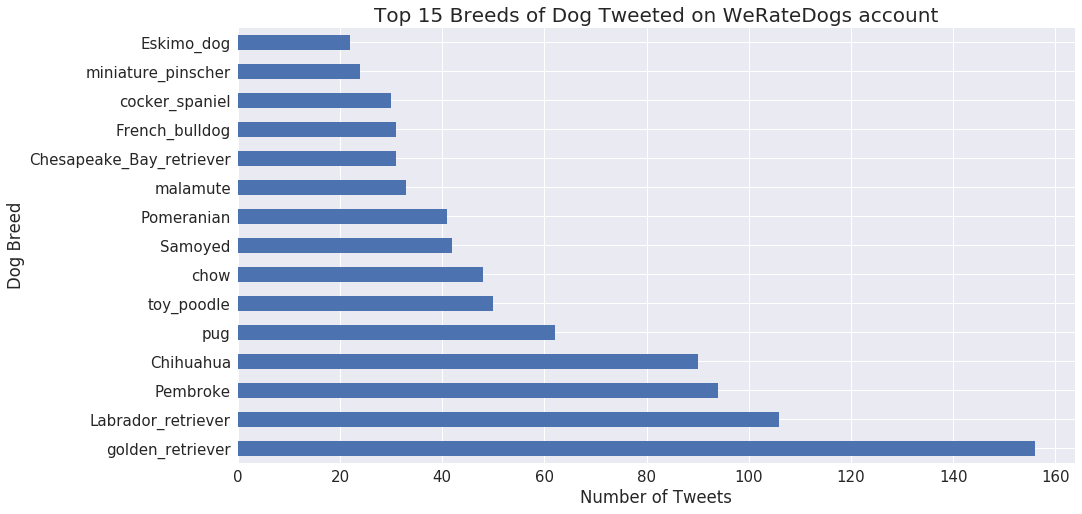

In [85]:
# Plot a horizontal bar chart to show top 15 breeds
fig = plt.figure(figsize=(15,8))
df_clean.groupby('dog_breed').count()['dog_score'].sort_values(ascending=False).nlargest(15).plot(kind='barh')
plt.title("Top 15 Breeds of Dog Tweeted on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets"); 

** We can see the top five tweeted dogs in order are Golden Retriever, Labrador Retriever, Pembroke Welsh Corgi, Chihuahua and Pug. **

** With the Golden Retriever receiving substantially more tweets at 156 than the other breeds. **

In [86]:
# Let's look at the ratings for each of the breeds
# Remembering to remove the 2 outliers we identified in the cleaning and the ratings for groups of dogs.
# So we take scores only from 0 to 14.
df_clean1 = df_clean[df_clean['dog_score'] <= 14] 

In [87]:
# Let's look at the statistice for all breeds removing outliers and groups.
df_clean1['dog_score'].describe()

count    1958.000000
mean       10.535751
std         2.176546
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: dog_score, dtype: float64

In [88]:
# Let's group these scores by breed and have a look at some statistics.
df_clean1.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan_hound,3.0,9.666667,5.773503,3.0,8.00,13.0,13.00,13.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.0,12.00,13.0
Australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.5,12.25,13.0
Bedlington_terrier,6.0,10.333333,3.141125,6.0,8.25,10.5,12.75,14.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0


In [89]:
# Let's look at the top scores by breed.
df_clean1.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

dog_breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Gordon_setter           11.750000
Irish_setter            11.750000
Samoyed                 11.690476
Name: dog_score, dtype: float64

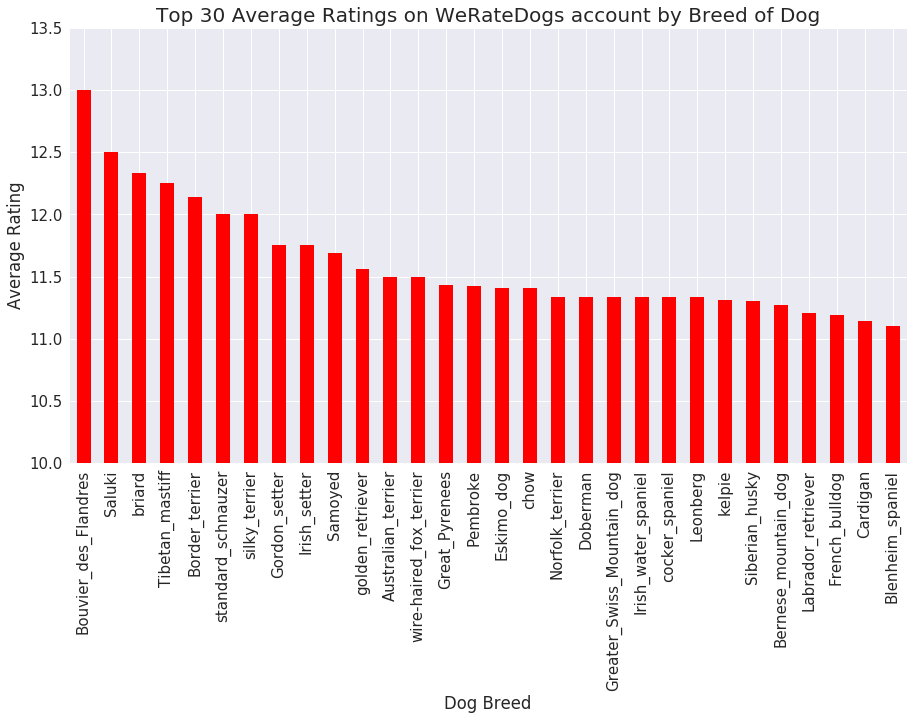

In [90]:
# Let's plot the top scores for the top 30 breeds on a standard bar chart
fig = plt.figure(figsize=(15,8))
df_clean1.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='red')
plt.title("Top 30 Average Ratings on WeRateDogs account by Breed of Dog",fontsize=20)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,13.5);

** So the top breeds by rating are Bouvier des Flandres, Saluki, Briard, Tibetan Mastiff and Border Terrier. These breeds are not as well-known as the breeds in our top tweeted dogs. Quickly checking I see that there is only one rating for Bouvier des Flandres. So this plot might be misleading. Let's redo the chart but include only breeds with at least 10 ratings. **  

In [91]:
# Create a variable that includes dog breeds with more than 9 counts
count = df_clean['dog_breed'].value_counts()

In [92]:
# Create a new dataframe which includes only dog breeds with at least 10 ratings
df_clean2 = df_clean[df_clean['dog_breed'].isin(count[count > 9].index)]

In [93]:
# Check the dataframe
df_clean2

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,312,85,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.83,320,93,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
6,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,11,10,None,toy_poodle,0.30,264,101,https://twitter.com/dog_rates/status/667470559035432960/photo/1,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
7,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,7,10,None,borzoi,0.85,548,237,https://twitter.com/dog_rates/status/667491009379606528/photo/1,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
8,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,Philippe,9,10,None,Chihuahua,0.14,545,287,https://twitter.com/dog_rates/status/667495797102141441/photo/1,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg
9,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,Hall,11,10,None,Labrador_retriever,1.00,548,227,https://twitter.com/dog_rates/status/667502640335572993/photo/1,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg
10,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,None,12,10,None,beagle,0.64,6996,2216,https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg
11,667517642048163840,2015-11-20 01:39:42,Twitter Web Client,This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,Dook,8,10,None,Italian_greyhound,0.13,379,198,https://twitter.com/dog_rates/status/667517642048163840/photo/1,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg
13,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,None,12,10,None,Chesapeake_Bay_retriever,0.09,1752,1167,https://twitter.com/dog_rates/status/667524857454854144/photo/1,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg
14,667534815156183040,2015-11-20 02:47:56,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",Frank,8,10,None,Pembroke,0.44,844,562,https://twitter.com/dog_rates/status/667534815156183040/photo/1,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg


In [94]:
# Let's filter out the outliers and groups of dogs.
df_clean3 = df_clean2[df_clean2['dog_score'] <= 14]

In [95]:
# statistical summary for these breeds.
df_clean3.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0
Boston_bull,12.0,9.416667,2.108784,5.0,8.75,10.0,11.00,12.0
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.0,12.00,13.0
Chesapeake_Bay_retriever,31.0,10.838710,1.439833,8.0,10.00,10.0,12.00,13.0
Chihuahua,90.0,10.533333,2.056505,3.0,10.00,11.0,12.00,14.0


In [96]:
# Let's relook at the top scores by breed.
df_clean3.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

dog_breed
Samoyed                 11.690476
golden_retriever        11.561290
Great_Pyrenees          11.428571
Pembroke                11.425532
Eskimo_dog              11.409091
chow                    11.404255
cocker_spaniel          11.333333
kelpie                  11.307692
Siberian_husky          11.300000
Bernese_mountain_dog    11.272727
Name: dog_score, dtype: float64

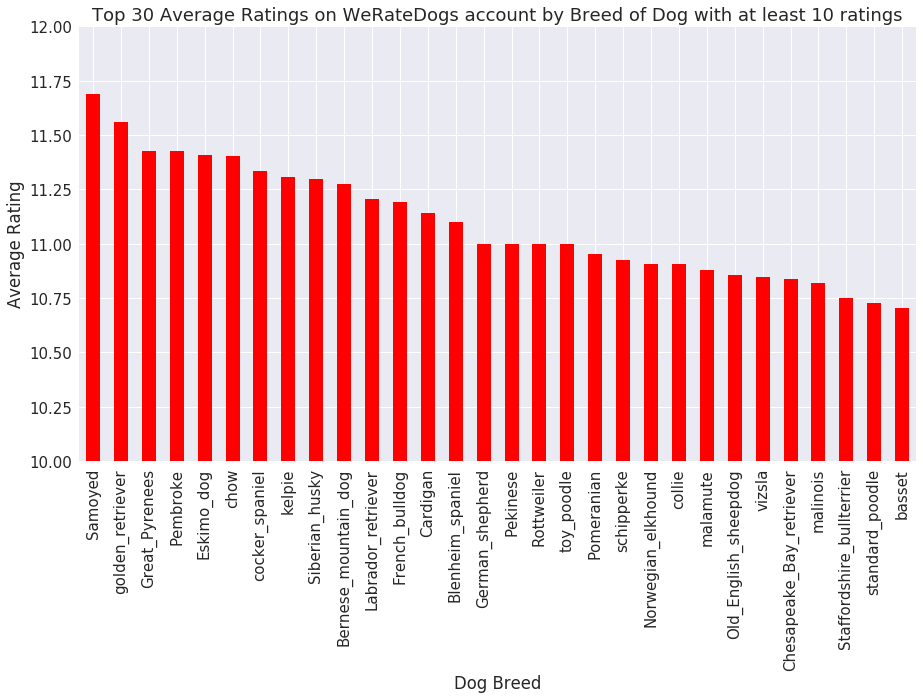

In [97]:
# Let's plot again the top scores for the top 30 breeds on a standard bar chart
fig = plt.figure(figsize=(15,8))
df_clean3.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='red')
plt.title("Top 30 Average Ratings on WeRateDogs account by Breed of Dog with at least 10 ratings",fontsize=18)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,12);

** Now our top rated breeds are Samoyed, Golden Retriever, Great Pyrenees, Pembroke Welsh Corgi and Eskimo Dog. **   

** The Golden Retriver and Pembroke Welsh Corgi appear on both our lists so far. **   

In [98]:
# Final analysis breeds with most average likes.
# Using the dataset filtered for breeds with more than 10 ratings, and excluding outliers and groups of dogs.
df_clean3.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,312,85,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.83,320,93,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
6,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,11,10,None,toy_poodle,0.30,264,101,https://twitter.com/dog_rates/status/667470559035432960/photo/1,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
7,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,7,10,None,borzoi,0.85,548,237,https://twitter.com/dog_rates/status/667491009379606528/photo/1,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
8,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,Philippe,9,10,None,Chihuahua,0.14,545,287,https://twitter.com/dog_rates/status/667495797102141441/photo/1,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg


In [99]:
# Total number of likes
df_clean3['no_of_likes'].sum()

13419630

In [100]:
# Total number of likes grouped by breed
df_clean3.groupby('dog_breed')['no_of_likes'].sum() 

dog_breed
Airedale                            62042
American_Staffordshire_terrier     146968
Bernese_mountain_dog                78605
Blenheim_spaniel                    90987
Border_collie                      105059
Boston_bull                         62272
Cardigan                           264157
Chesapeake_Bay_retriever           306507
Chihuahua                          761129
English_springer                   138815
Eskimo_dog                         230119
French_bulldog                     610524
German_shepherd                    213126
Great_Dane                          68593
Great_Pyrenees                     179683
Italian_greyhound                  139341
Labrador_retriever                1227986
Lakeland_terrier                   212291
Maltese_dog                         54936
Norwegian_elkhound                 121584
Old_English_sheepdog               102909
Pekinese                            94451
Pembroke                          1037792
Pomeranian              

In [101]:
# Number of tweets per dog breed
df_clean3.groupby('dog_breed')['no_of_likes'].count()

dog_breed
Airedale                           12
American_Staffordshire_terrier     16
Bernese_mountain_dog               11
Blenheim_spaniel                   10
Border_collie                      12
Boston_bull                        12
Cardigan                           21
Chesapeake_Bay_retriever           31
Chihuahua                          90
English_springer                   10
Eskimo_dog                         22
French_bulldog                     31
German_shepherd                    21
Great_Dane                         11
Great_Pyrenees                     14
Italian_greyhound                  17
Labrador_retriever                103
Lakeland_terrier                   17
Maltese_dog                        19
Norwegian_elkhound                 11
Old_English_sheepdog               14
Pekinese                           14
Pembroke                           94
Pomeranian                         41
Rottweiler                         18
Samoyed                            42
Sh

In [102]:
# Average number of likes per tweet for each dog breed
df_clean4 = round(df_clean3.groupby('dog_breed')['no_of_likes'].sum() / df_clean3.groupby('dog_breed')['no_of_likes'].count(),0)
df_clean4.sort_values(ascending=False)

dog_breed
French_bulldog                    19694.0
whippet                           14388.0
English_springer                  13882.0
standard_poodle                   13653.0
Samoyed                           13625.0
cocker_spaniel                    13577.0
Great_Pyrenees                    12834.0
Cardigan                          12579.0
Lakeland_terrier                  12488.0
golden_retriever                  12402.0
Labrador_retriever                11922.0
basset                            11547.0
Norwegian_elkhound                11053.0
Pembroke                          11040.0
malamute                          10646.0
Eskimo_dog                        10460.0
German_shepherd                   10149.0
kelpie                             9896.0
Chesapeake_Bay_retriever           9887.0
chow                               9487.0
Staffordshire_bullterrier          9296.0
American_Staffordshire_terrier     9186.0
Blenheim_spaniel                   9099.0
Border_collie           

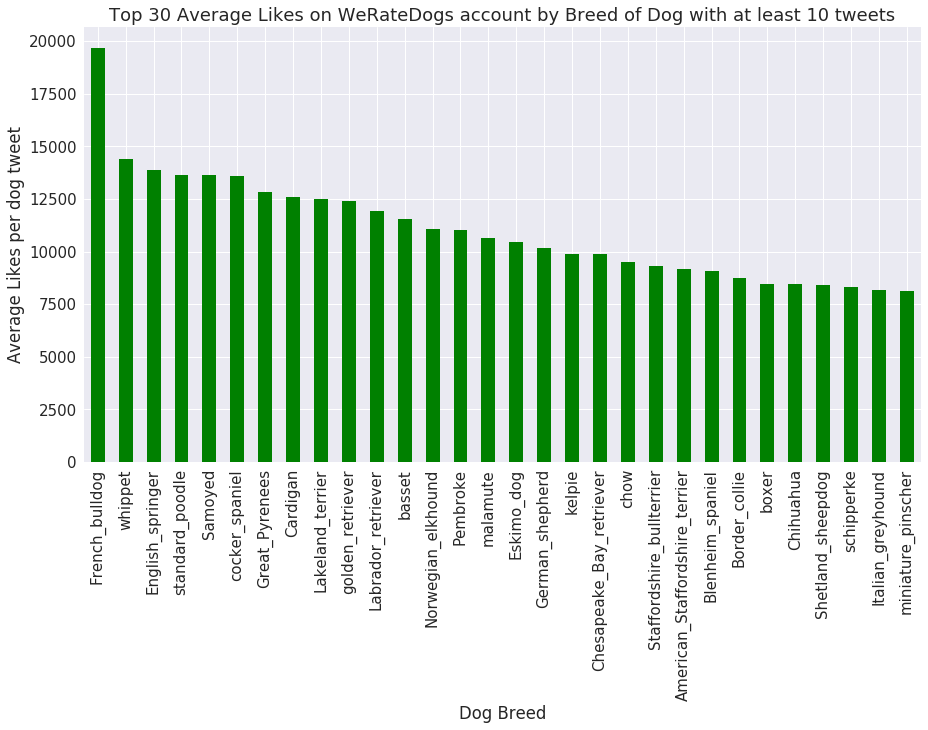

In [103]:
# Let's plot again the average most likes for the top 30 breeds on another bar chart
fig = plt.figure(figsize=(15,8))
df_clean4.sort_values(ascending=False).nlargest(30).plot(kind='bar',color='green')
plt.title("Top 30 Average Likes on WeRateDogs account by Breed of Dog with at least 10 tweets",fontsize=18)
plt.ylabel("Average Likes per dog tweet")
plt.xlabel("Dog Breed");

** So the French bulldog is clearly the dog most liked on likes/tweet. Obviously very cute to get so many likes! **   

** Also in the top 10 are Samoyed, Great Pyrenees and Golden Retriever, and at number 11 is the Labrador Retriever and number 14 the Pembroke Welsh Corgi from our other visualizations. **   

** Conclusion: The following breeds of dog seem a good place to start for further investigation into practical aspects costs, pedigree, availability, caring needs and whether my family has empathy for the breed and animal in particular. ** 

** Golden Retriever, French Bulldog, Pembroke Welsh Corgi, Samoyed, and Great Pyrenees. **   



## Sources

Udacity Data Wrangling Course - Notes taken.   

https://pandas.pydata.org   
https://stackoverflow.com/questions   
https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf   
https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id   
https://nocodewebscraping.com/twitter-json-examples/   
http://empierce.com/index.php/2017/11/14/wrangling-weratedogs/   
https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/   